# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [360]:
# Given our model score, why did we choose the model with a either a higher F1 Score, or accuracy score, T-score or the Precision score 

# Import our libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Why we choose CART. There is continous values in our dataset which makes CART extremely precise. The dataset contains: 93 continuous columns: These are floating-point values (e.g., ratios, percentages, financial metrics), which are continuous in nature. The bankrupt? Coloumn is a binary coloumn 

In [335]:
# Read the data into a dataframe
df = pd.read_csv('datasets/data.csv')
df.shape
df.columns


Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [336]:

# Chekcing the first 5 data sets
df.head()



,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# Pre-Processing Steps 

In [337]:
# Separate the features (x) and the target variable (y)

y = df['Bankrupt?']                              #Seperating the Bankrupt? Column from the rest of the columns as the entire prediction hinges on this coloumn 
x = df.drop(columns=['Bankrupt?'])

# Split the dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Initialize the scaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform it

x_trained_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test= scaler.fit_transform(x_test)

In [338]:
# Split the data into the training and test data
# We chose test size 0.3 beacuse 30% of the data allocated for testing and 70% for training.
# This avoids over-fitting as a small test set relies on  too few examples, increasing the chances of overfitting.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)     

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# regularization constant (strength) to prevent overfitting as well
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength, stronger regularization with smaller values
model = LogisticRegression(multi_class='multinomial', penalty='l2', C=1./REG_CONST, max_iter=300) 
model.fit(x_train_scaled, y_train)

# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 0.963


/Users/belinda/Desktop/MY-DAC-Curriculum/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Area under the ROC Curve 
* Measures model abiility to distinguish between positive and negative classes across all possible classification thresholds 
* 1.0 means perfect distinction between classes 
* AUC = ___ means the model is quite effective, with an __% chance of ranking a randomly chosen positive instance higher than a randomly chosen negative instance 
 
F1 Score 
* Balances precision and recall metrics into a single score 
* F1 = ___ means balance is low. Precision, recall or both are insufficient for a predicti

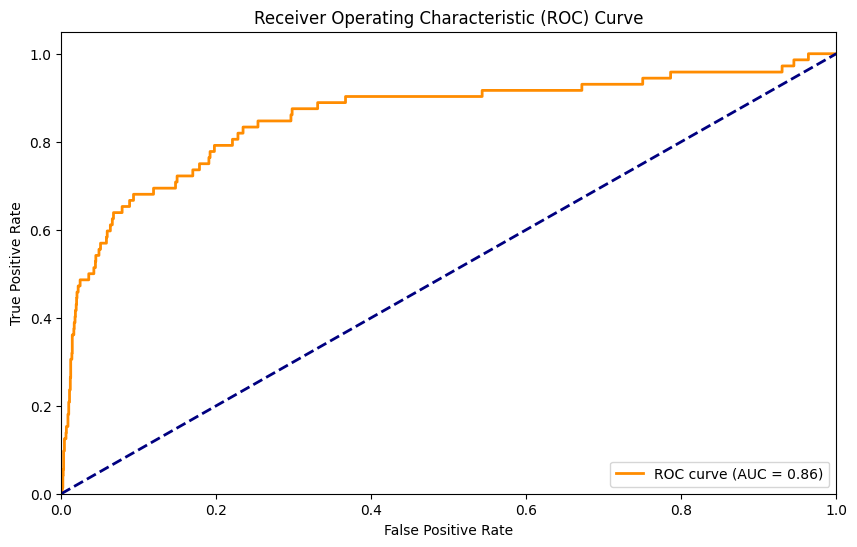

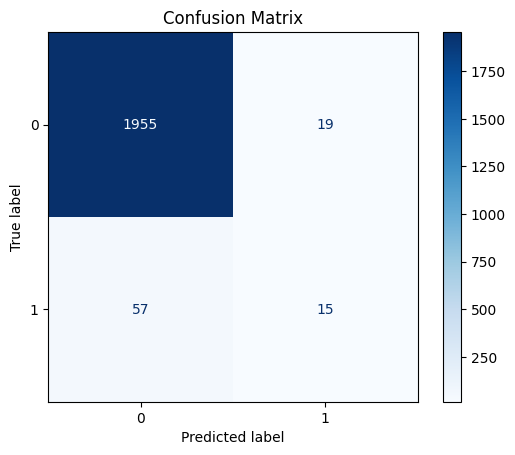

AUC Score: 0.856
F1 Score: 0.283

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1974
           1       0.44      0.21      0.28        72

    accuracy                           0.96      2046
   macro avg       0.71      0.60      0.63      2046
weighted avg       0.95      0.96      0.96      2046



In [339]:
# Get prediction probabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Why we are not using Simple Logistic Regression: The F1 score, which balances precision and recall metrics into a single score, is 0.341 which is low. This means that precision, recall or both are insufficient for a prediction. 


DecisionTreeClassifier: accuracy = 0.964


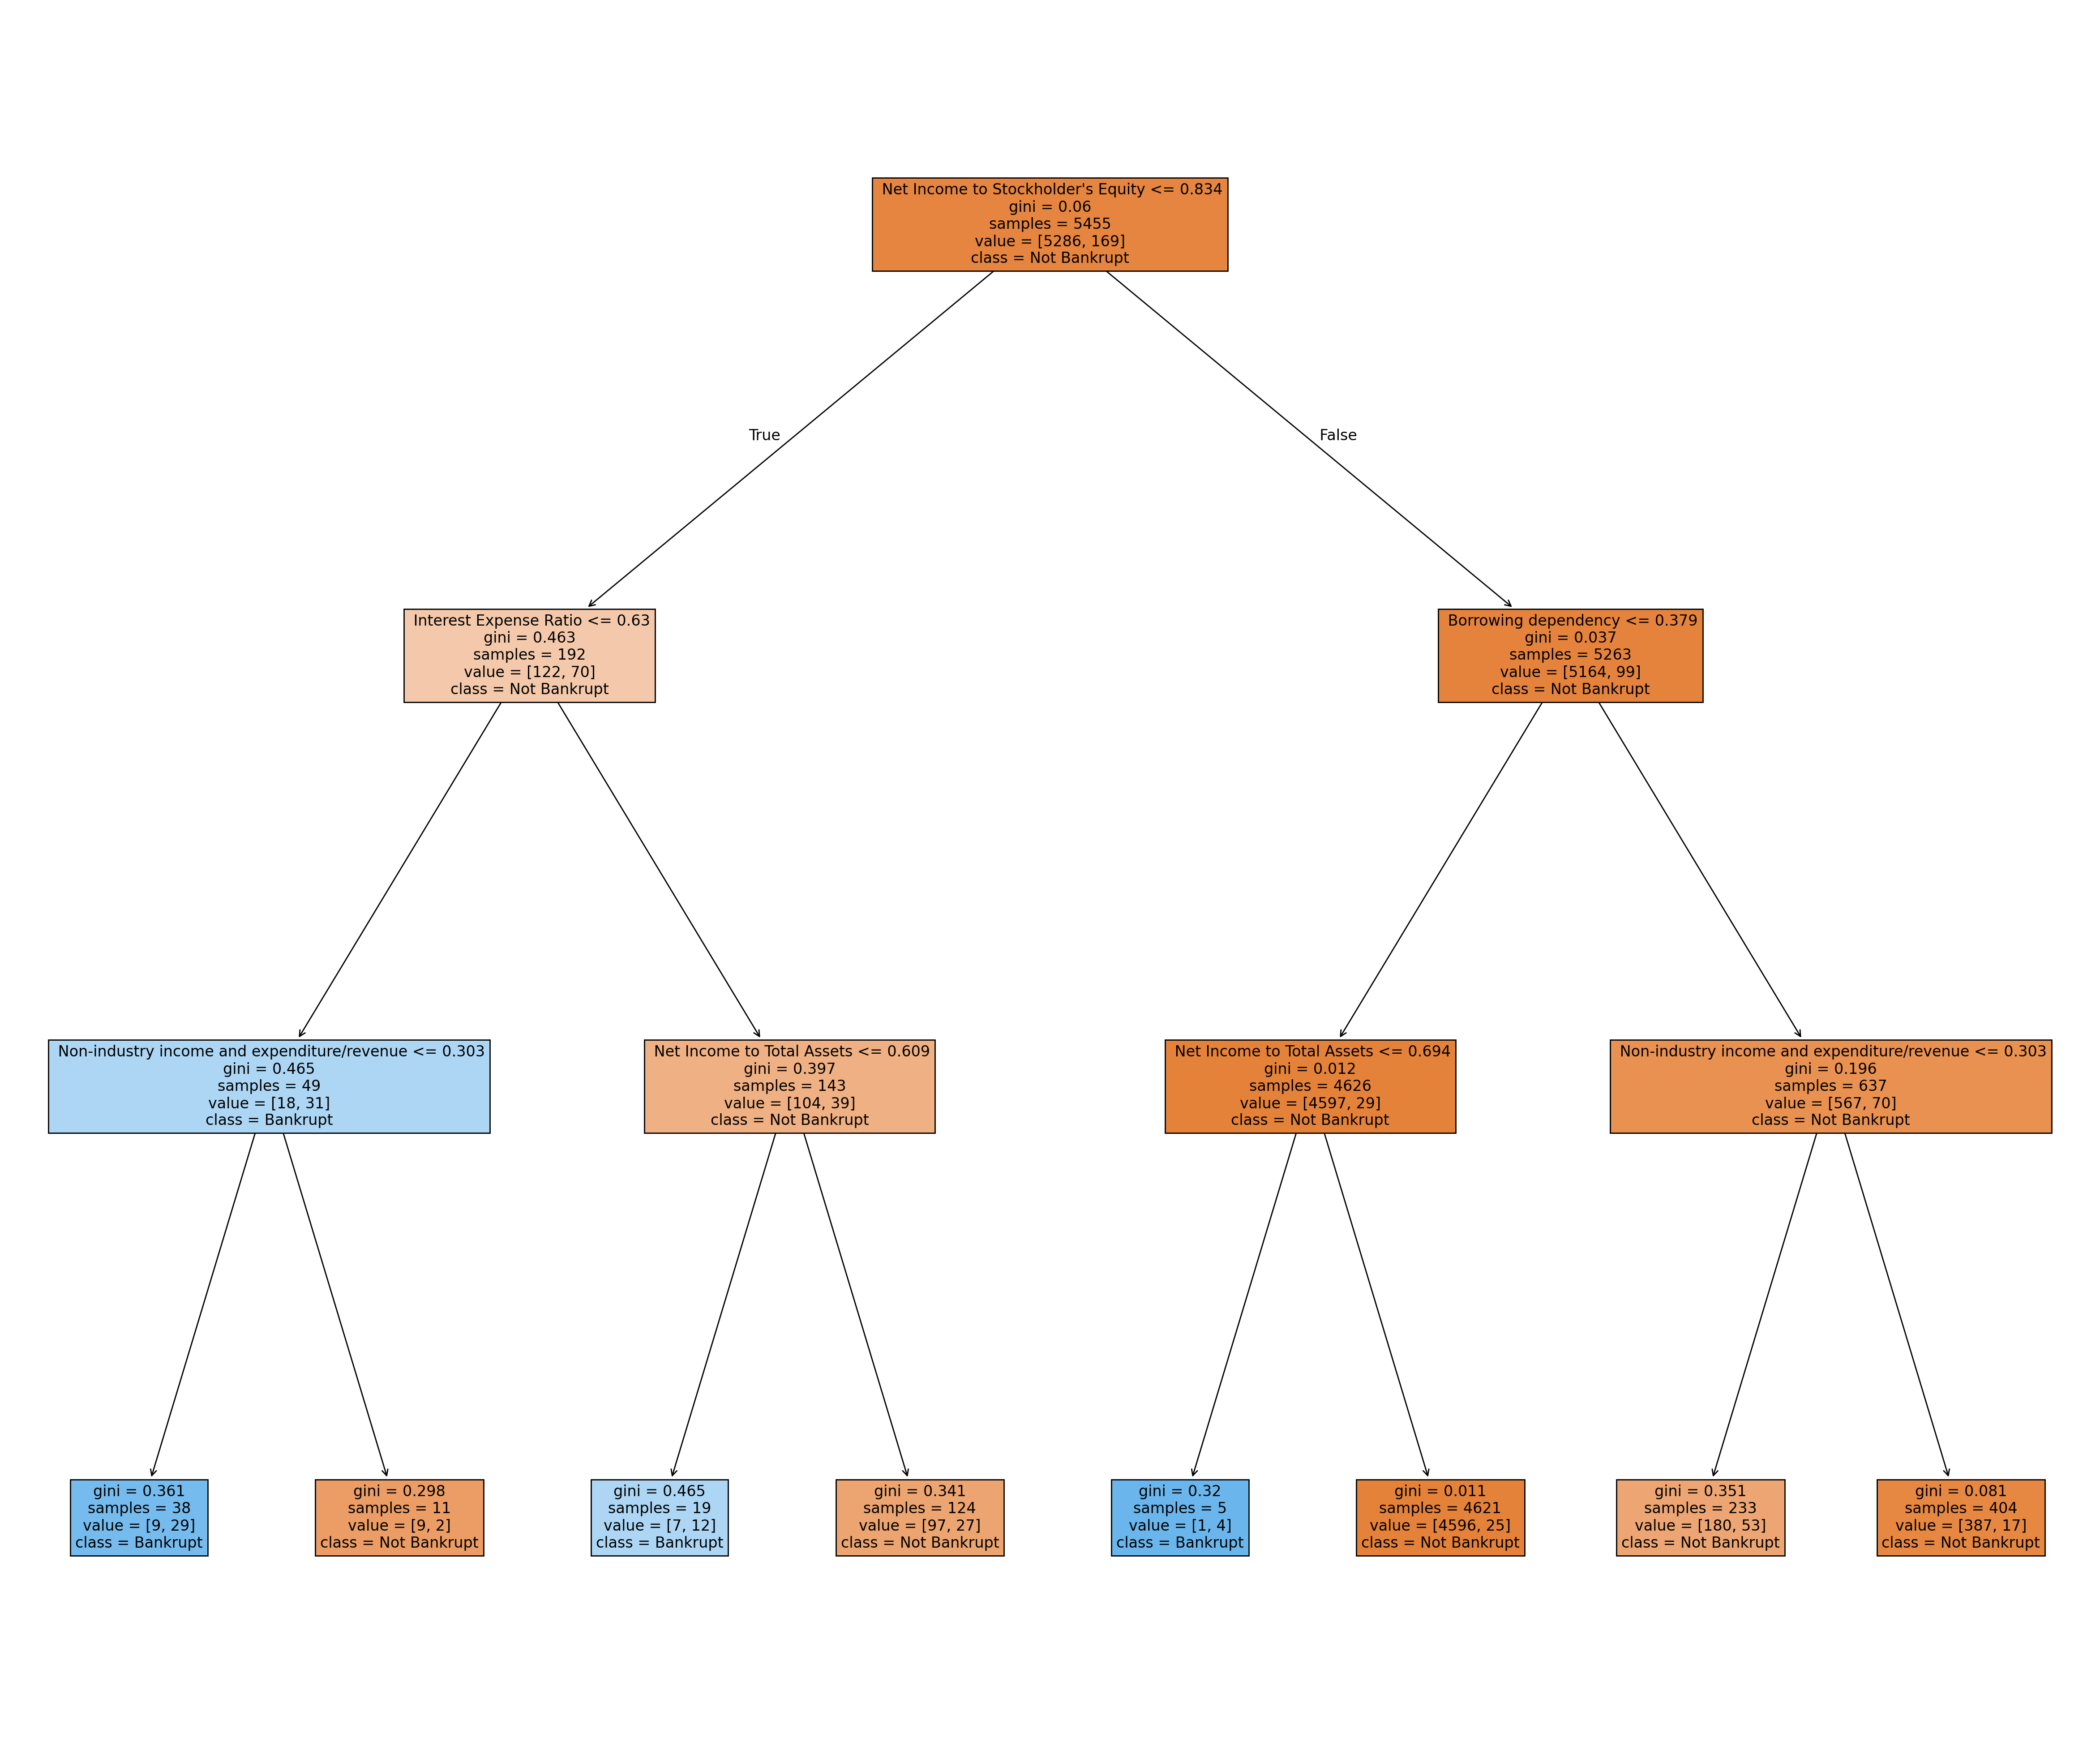

In [340]:
#For CART

#Building the decision tree 
#Re-defining variables 
x = df.drop ('Bankrupt?', axis=1)
y = df['Bankrupt?']
depth = 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  


# We chose test_size=0.2 to avoid overfitting

DT_model = DecisionTreeClassifier(max_depth=depth, 
                                  random_state=42)
DT_model.fit(x_train, y_train)
sk_pred = DT_model.predict(x_test)
acc = (y_test == sk_pred).mean()
print('DecisionTreeClassifier: accuracy = {:.3f}'.format(acc))

# plotting 
feature_names = x.columns.tolist()
plt.figure(figsize=(30, 25), dpi=200)
tree.plot_tree(DT_model,
               feature_names=feature_names,
               class_names=['Not Bankrupt', 'Bankrupt'],
               filled=True, #Blue represents Not Bankrupt  #Orange represents Bankrupt 
               fontsize=12   
            )
plt.show()




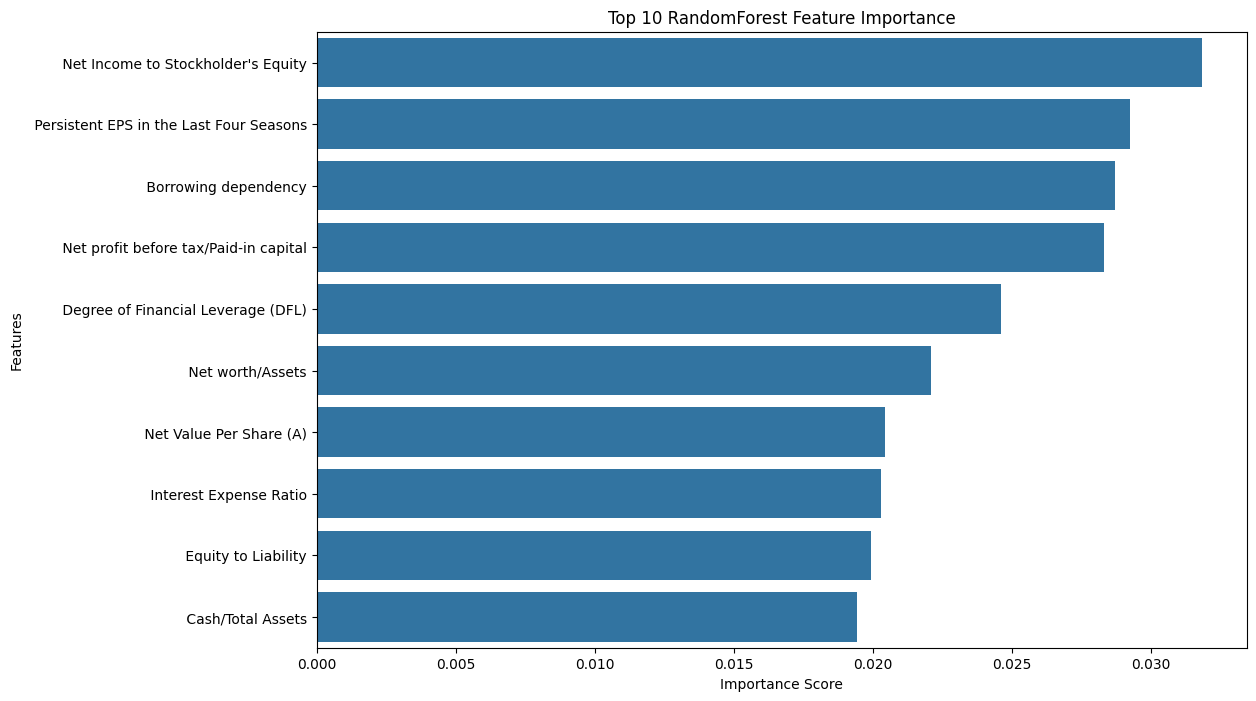

In [344]:

# Separate features and target variable
target_column = 'Bankrupt?'  # Target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf_model.fit(X_train, y_train)

# Feature importance from RandomForest
rf_importances = rf_model.feature_importances_
rf_features = df.drop(columns=[target_column]).columns

# Get the top 10 features based on importance
top_n = 10
sorted_indices = np.argsort(rf_importances)[::-1]  # Sort indices in descending order
top_indices = sorted_indices[:top_n]  # Get indices of the top 10 features

top_importances = rf_importances[top_indices]
top_features = rf_features[top_indices]

# Plot the top 10 RandomForest feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=top_importances, y=top_features)
plt.title(f'Top {top_n} RandomForest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()



Depth = 1, train_acc = 0.9658, eval_acc = 0.9736
Depth = 2, train_acc = 0.9690, eval_acc = 0.9707
Depth = 3, train_acc = 0.9713, eval_acc = 0.9746
Depth = 4, train_acc = 0.9753, eval_acc = 0.9687
Depth = 5, train_acc = 0.9809, eval_acc = 0.9717
Depth = 6, train_acc = 0.9866, eval_acc = 0.9629
Depth = 7, train_acc = 0.9897, eval_acc = 0.9638
Depth = 8, train_acc = 0.9931, eval_acc = 0.9580


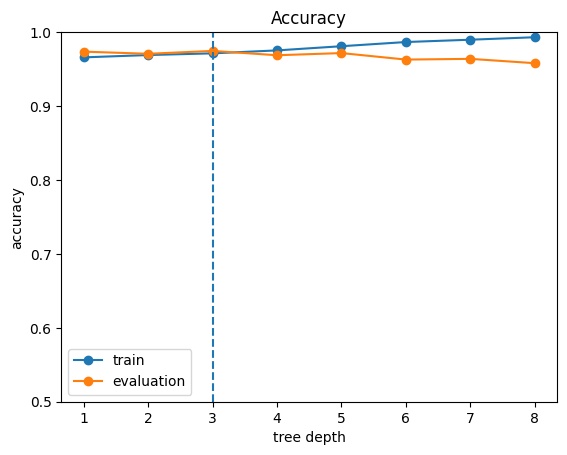

In [365]:
# Separate the data into features and target class.
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

# Split the data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

Optimal depth = 3, test_acc = 0.9726


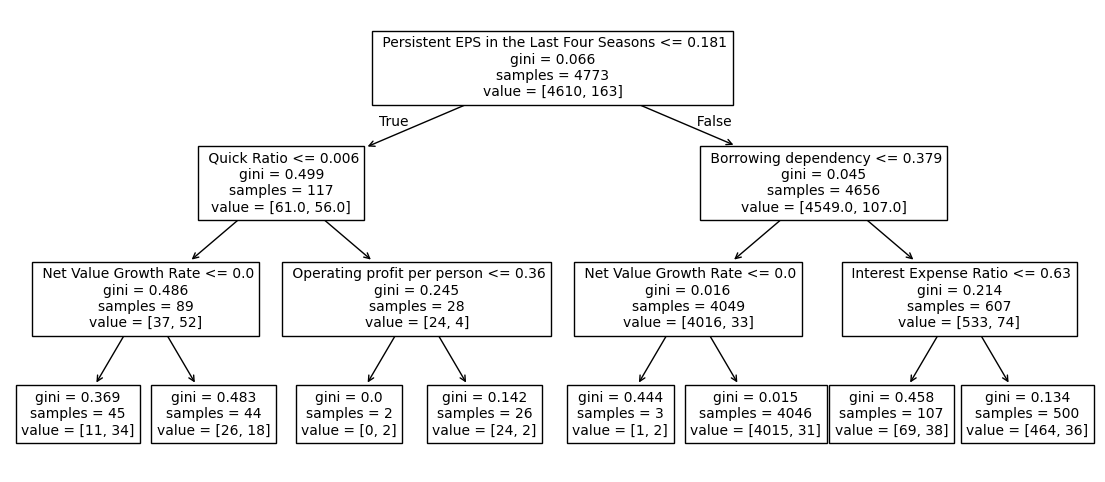

In [366]:
# I set max_step=1 as a constant value for tree visualization.
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

# Use test data to evaluate final performance.
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# Visualize the tree
# plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

